In [97]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

In [98]:
customer_data = pd.read_excel('customer_churn_large_dataset.xlsx')

In [99]:
customer_data.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [100]:
customer_data.shape

(100000, 9)

In [101]:
customer_data.columns.values

array(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'], dtype=object)

In [102]:
customer_data.dtypes

CustomerID                      int64
Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

In [103]:
customer_data.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [104]:
#As we can see from the basic decription table above
#The mean of monthly bill is around $65 and much more interesting data
# can be seen 

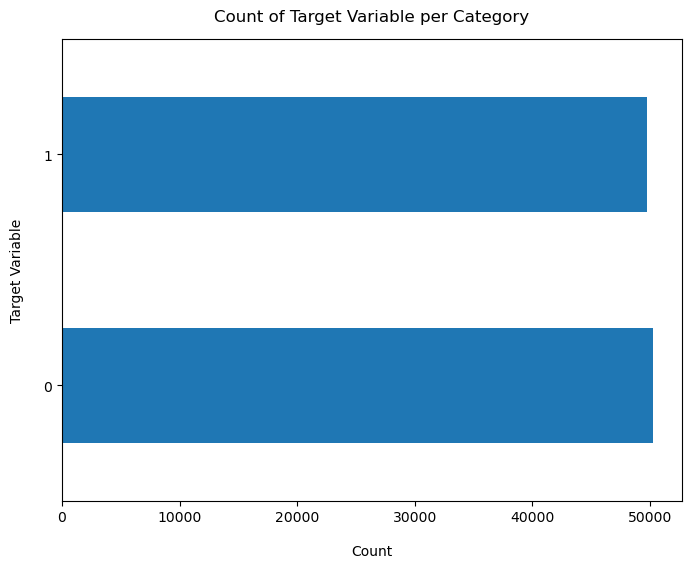

In [105]:
customer_data['Churn'].value_counts().plot(kind='barh', figsize=(8,6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of Target Variable per Category", y=1.02);

In [106]:
100*customer_data['Churn'].value_counts()/len(customer_data['Churn'])

0    50.221
1    49.779
Name: Churn, dtype: float64

In [107]:
#From this distribution, we can infer that the dataset is relatively balanced between the two classes.

In [108]:
customer_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


C:\Users\vaibh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


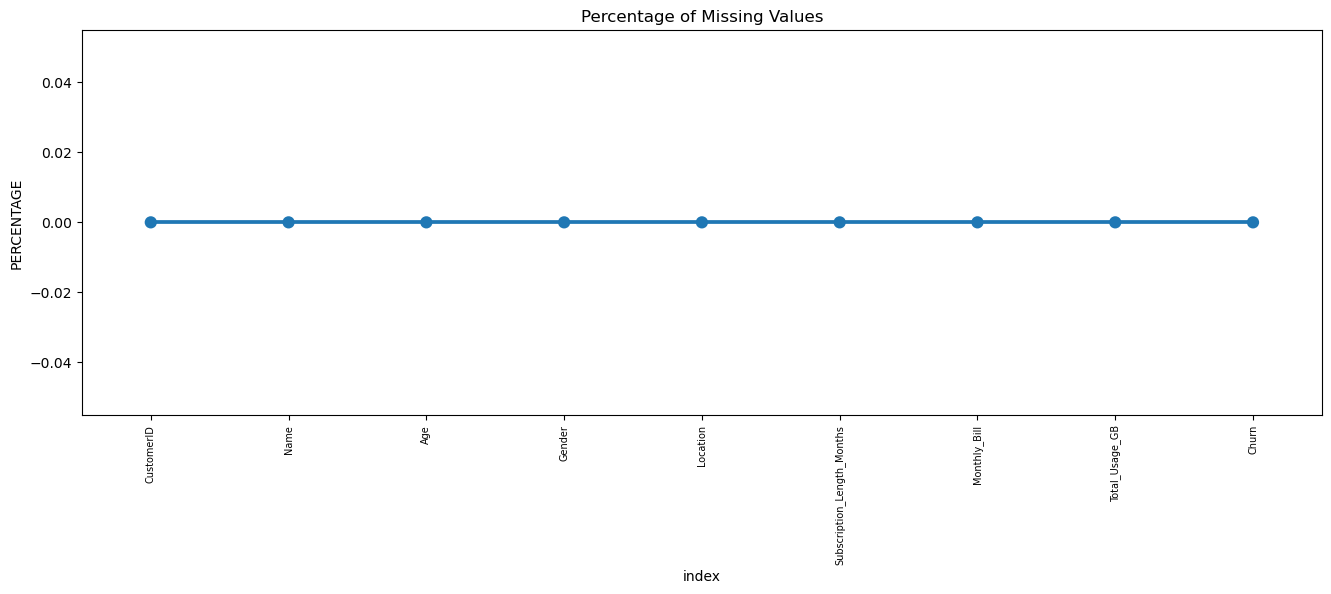

In [109]:
missing = pd.DataFrame((customer_data.isnull().sum())*100/customer_data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation = 90, fontsize = 7)
plt.title("Percentage of Missing Values")
plt.ylabel("PERCENTAGE")
plt.show()

In [110]:
# As we can see none of the variables have any missing values

In [111]:
# Now we have to do Data Cleaning
# i.e, create a copy of our original data for manipulation and processing

In [112]:
cleaned_data = customer_data.copy()

In [113]:
cleaned_data.Name = pd.to_numeric(cleaned_data.Name, errors='coerce')
cleaned_data.isnull().sum()

CustomerID                         0
Name                          100000
Age                                0
Gender                             0
Location                           0
Subscription_Length_Months         0
Monthly_Bill                       0
Total_Usage_GB                     0
Churn                              0
dtype: int64

In [114]:
cleaned_data.loc[cleaned_data['Name'].isnull() == True]

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,NaN,63,Male,Los Angeles,17,73.36,236,0
1,2,NaN,62,Female,New York,1,48.76,172,0
2,3,NaN,24,Female,Los Angeles,5,85.47,460,0
3,4,NaN,36,Female,Miami,3,97.94,297,1
4,5,NaN,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...,...,...
99995,99996,NaN,33,Male,Houston,23,55.13,226,1
99996,99997,NaN,62,Female,New York,19,61.65,351,0
99997,99998,NaN,64,Male,Chicago,17,96.11,251,1
99998,99999,NaN,51,Female,New York,20,49.25,434,1


In [115]:
# Since this column 'Name' is only filled with null values, there is no point keeping it 
# in the dataset, so we will remove this column completely

In [116]:
cleaned_data.drop(columns=['Name'], inplace=True)

In [117]:
100*cleaned_data['Gender'].value_counts()/len(cleaned_data['Gender'])

Female    50.216
Male      49.784
Name: Gender, dtype: float64

In [118]:
# Since CustomerID is also an irrelevant column w.r.t our analysis, it needs to be removed as well.

In [119]:
cleaned_data.drop(columns=['CustomerID'], inplace=True)

In [120]:
cleaned_data.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0


In [121]:
print(cleaned_data['Age'].max())

70


In [122]:
labels = ["{0} - {1}".format(i, i + 9) for i in range(1,70,10)]
cleaned_data['Age_group'] = pd.cut(cleaned_data.Age, range(1,80,10), right=False, labels=labels)

In [123]:
cleaned_data['Age_group'].value_counts()

51 - 60    18966
41 - 50    18932
31 - 40    18864
61 - 70    18815
21 - 30    18757
11 - 20     5666
1 - 10         0
Name: Age_group, dtype: int64

In [124]:
cleaned_data.drop(columns= ['Age'], axis=1, inplace=True)

In [125]:
cleaned_data.head()

,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Age_group
0,Male,Los Angeles,17,73.36,236,0,61 - 70
1,Female,New York,1,48.76,172,0,61 - 70
2,Female,Los Angeles,5,85.47,460,0,21 - 30
3,Female,Miami,3,97.94,297,1,31 - 40
4,Female,Miami,19,58.14,266,0,41 - 50


In [126]:
# Now lets get started with Exploratory Data Analysis
# Univariate Analysis

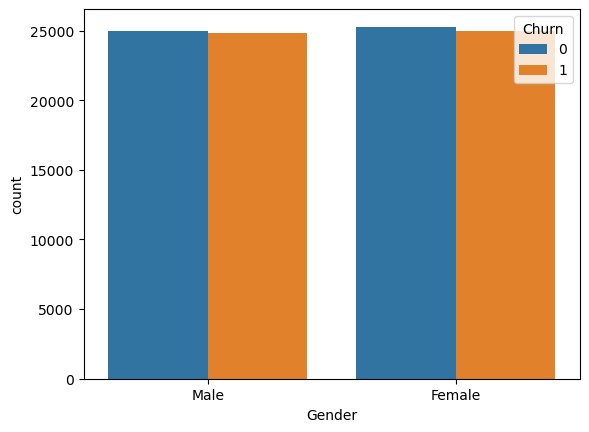

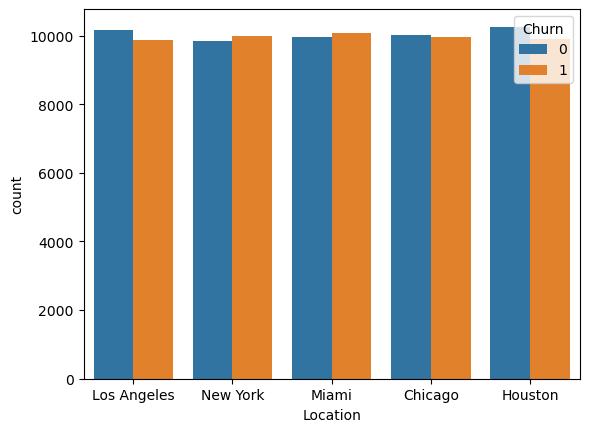

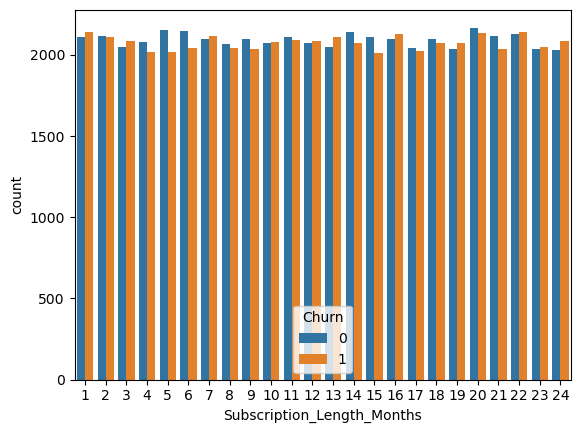

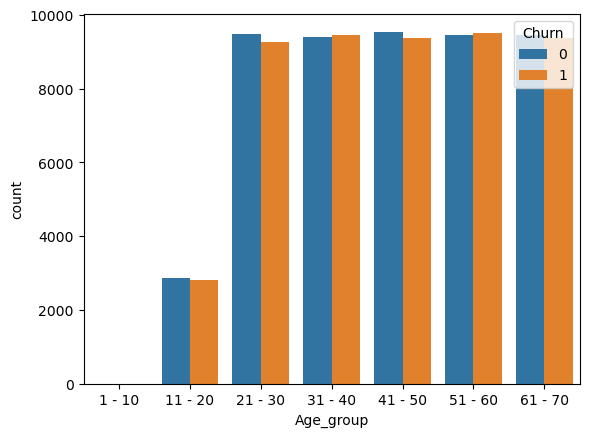

In [127]:
for i, predictor in enumerate(cleaned_data.drop(columns=['Churn','Monthly_Bill','Total_Usage_GB',])):
    plt.figure(i)
    sns.countplot(data=cleaned_data, x=predictor, hue='Churn')

In [128]:
cleaned_data.head()

,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Age_group
0,Male,Los Angeles,17,73.36,236,0,61 - 70
1,Female,New York,1,48.76,172,0,61 - 70
2,Female,Los Angeles,5,85.47,460,0,21 - 30
3,Female,Miami,3,97.94,297,1,31 - 40
4,Female,Miami,19,58.14,266,0,41 - 50


In [129]:
cleaned_data_dummies = pd.get_dummies(cleaned_data)
cleaned_data_dummies.head()

,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender_Female,Gender_Male,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,Age_group_1 - 10,Age_group_11 - 20,Age_group_21 - 30,Age_group_31 - 40,Age_group_41 - 50,Age_group_51 - 60,Age_group_61 - 70
0,17,73.36,236,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
1,1,48.76,172,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
2,5,85.47,460,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
3,3,97.94,297,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0
4,19,58.14,266,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0


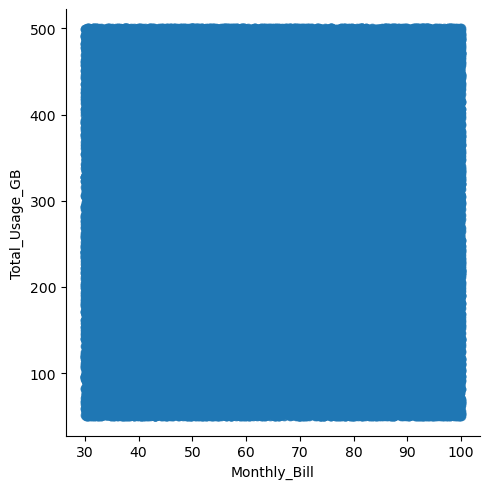

In [137]:
sns.lmplot(data=cleaned_data_dummies, x='Monthly_Bill', y='Total_Usage_GB', fit_reg=False)

In [ ]:
# This wasn't much help, lets try another approach 

Text(0.5, 1.0, 'Monthly Bill by Churn')

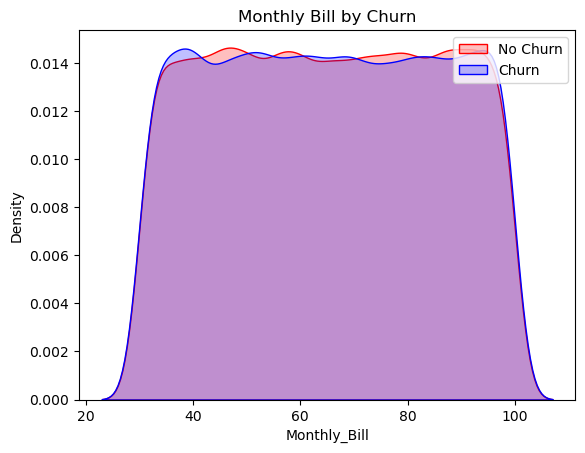

In [138]:
mth = sns.kdeplot(cleaned_data_dummies.Monthly_Bill[(cleaned_data_dummies["Churn"] == 0) ],
                 color="Red", shade=True)
mth = sns.kdeplot(cleaned_data_dummies.Monthly_Bill[(cleaned_data_dummies["Churn"] == 1) ],
                 ax=mth, color="Blue", shade=True)
mth.legend(["No Churn","Churn"],loc='upper right')
mth.set_ylabel('Density')
mth.set_xlabel('Monthly_Bill')
mth.set_title('Monthly Bill by Churn')

In [ ]:
# Lets make a Heatmap and see what is shows us

<AxesSubplot:>

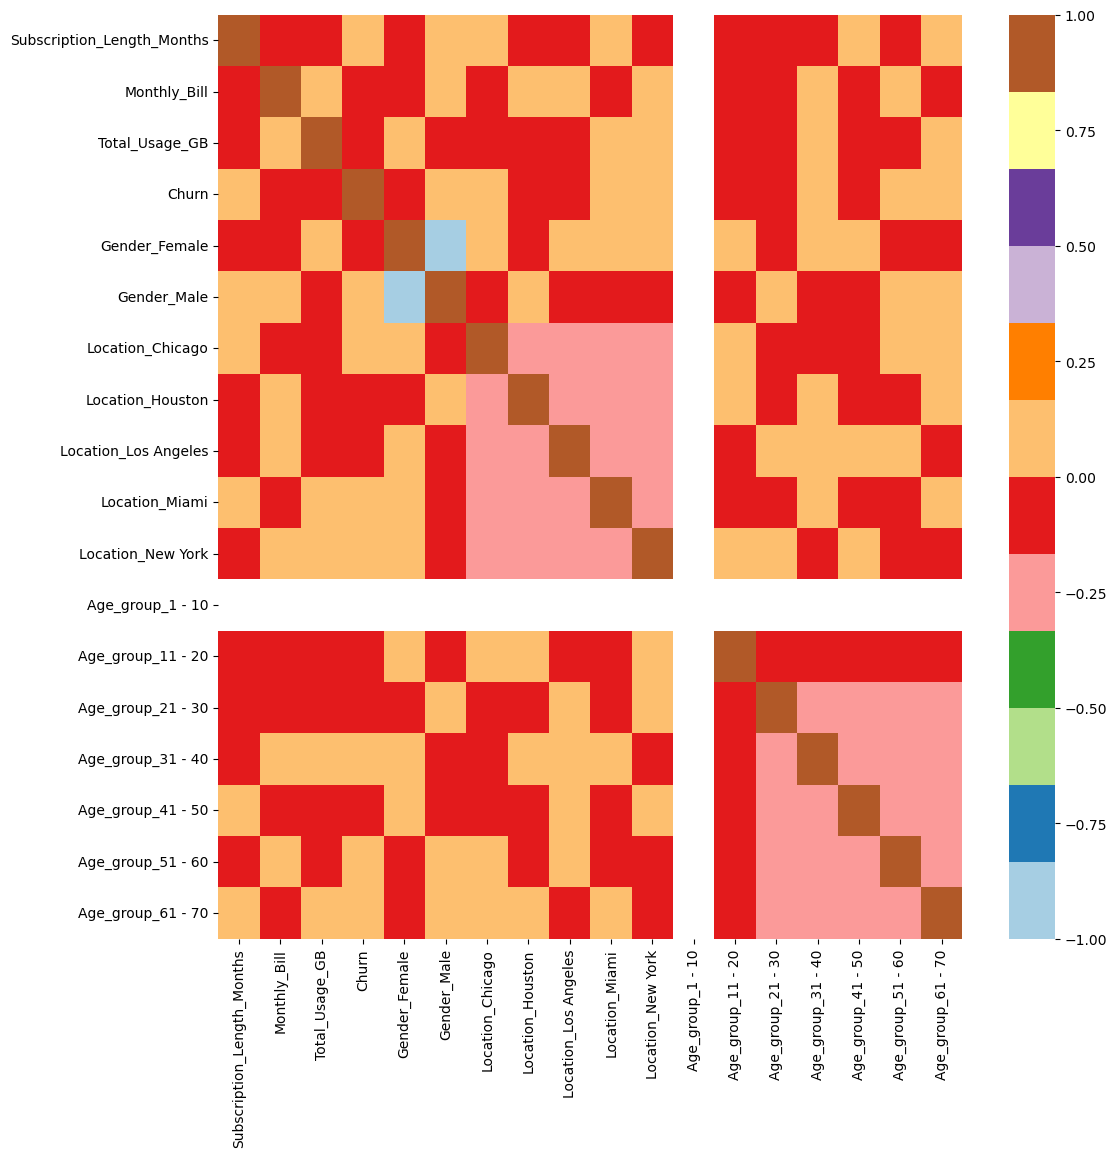

In [141]:
plt.figure(figsize=(12,12))
sns.heatmap(cleaned_data_dummies.corr(), cmap="Paired")

In [142]:
cleaned_data_dummies.to_csv('processed_data.csv', index=False)